# Assignemnt 3

In [1]:
using Distributions,SpecialFunctions,Random,Plots,StatsPlots 

### 1. Consider estimating the mean of a standard Cauchy distribution using importance sampling with a normal proposal distribution. Does the estimator have finite variance?

\begin{align}
 Standard \ Cauchy & = \frac{1}{\pi(1 + x^2)}
 \\ Proposal \ Distribution & = N(0, \sigma^2)
 \\ if,\ sup\ \frac{\pi(x)}{g(x)} & \to finite \ number
 \\ Then \ we \ will \ have \ a \ finite \ vari&ance \ for \  the \ estimator
 \\ sup \frac{\pi(x)}{g(x)} = & \ {\frac{1}{\pi(1 + x^2)}}\bigg/ \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}
 \\ Hence, sup\frac{\pi(x)}{g(x)} & \to \infty
\\ \\ Now , \hat{\theta_g} \propto \  & \Sigma^{n}_{i=1} \frac{x_i}{1+ {x_i}^2}\bigg/e^{\frac{-{x_i}^2}{2}}
\\ \hat{\theta_g} \propto & \ \Sigma^{n}_{i=1} \frac{x_i}{1+ {x_i}^2} e^{\frac{{x_i}^2}{2}}
\\ \hat{\theta_g} \to  & \infty (or \ diverges)
\\
\\ Hence , \ Variance \ & [ \hat{\theta_g} ] \ diverges 
\end{align}

2 .Considering a target density f(x) and an importance proposal g(x). Suppose

Then we know that the simple importance estimator has a finite variance. Does the weighted importance estimator also have finite variance? 
To estimate the mean of the target density, is there any benefit to using importance sampling over accept-reject sampling?


a . As the supremum is finite, which tells us that the importance estimator has finite variance.

Now lets suppose that finite number is some constant x.

While Calulating the supremum of the ratio of f-tilda(x) and g-tilda(x) the supremum would result to be a multiplication of the ratio of normalizing constants and the finite constant x.

Hence the variance for weighted importance sampling will be finite

3 .For some known yiℝ, i = 1, 2, ... , n and some 𝜈>2, suppose the target density is 
 
To generate y’s use the following specifications:
Set the seed as 1
n=50
𝜈=5
Use the ‘Distributions’ package in Julia to randomly sample n values from a T-distribution with 𝜈 degrees of freedom. The sampled vector is y.
Implement an importance sampling estimator with a N(0, 1) proposal to estimate the first moment of this distribution. Does the weighted importance sampling estimator have finite variance? What happens if 𝜈=1 and 𝜈=2 ?


In [58]:
Random.seed!(1)
arr_y=[]
product(x)=1
function get_y(v)
    for i in 1:50
        y=rand(TDist(v))
        push!(arr_y,y)
    end
end
function get_est(N,v,n)
    get_y(5)
    for i in 1:50
        product(x) = product(x) * (1 + ((arr_y[i] - x)^2) / ν)^(-(ν + 1) / 2)
    end
    
    normal_dis(x)=exp(-(x*x)/2)/(2*π)^(1/2)
    pi(x)=ℯ^(-x^2 / 2) * product(x)
    
    num = 0
    denom = 0
    est = zeros(N)

    for i = 1:N
        x = rand(Normal())
        r = pi(x) / normal_dis(x)
        num += x * r
        denom += r
        est[i] = num / denom
    end
    
    return est  
end

get_est (generic function with 1 method)

In [75]:
est_5=get_est(100000,5,50)
estimate_5 = last(est_5)

-0.008337212950717545

In [80]:
est_1=get_est(100000,5,50)
estimate_1 = last(est_1)

0.0018621486464015836

In [83]:
est_2=get_est(100000,5,50)
estimate_2 = last(est_2)

0.001914825535985426

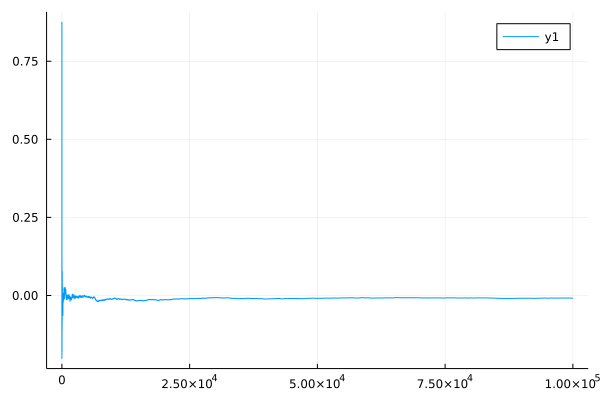

In [85]:
plot(est_5)

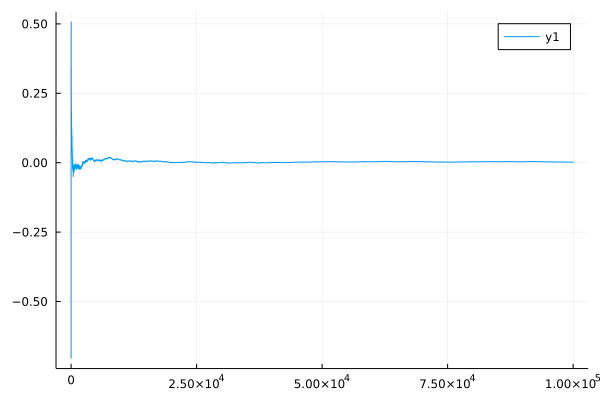

In [86]:
plot(est_1)

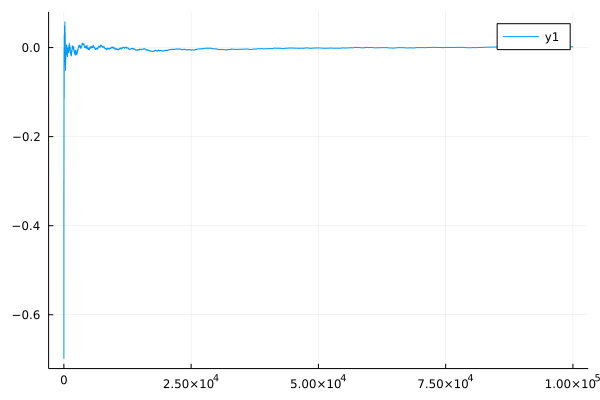

In [87]:
plot(est_2)

 4 .Suppose Y1, Y2, ... , Yn | 𝜆 Poisson(𝜆) (iid draws) and the prior 𝜆Gamma(𝛼, 𝛽), where 𝛼, 𝛽 are known. What is the posterior distribution of 𝜆 ?

\begin{equation}
  f(x_{1},x_{2},...,x_{n} | \lambda ) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}} e^{-\lambda}}{x_{i}!}
\end{equation}

\begin{equation}
    f(\lambda) = \frac{\beta^{\lambda}}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}
\end{equation}


\begin{align}
  f(\lambda |x_{1},x_{2},...,x_{n}) \propto & f(\lambda) f(x_{1},x_{2},...,x_{n} | \lambda )
 \\  \propto & \prod_{i=1}^{n} \frac{\lambda^{x_{i}} e^{-\lambda}}{x_{i}!} \times \frac{\beta^{\lambda}}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}
 \\ \propto & \lambda^{sum + \alpha - 1 } e^{-(\beta+n)\lambda}
 \\ \propto & Gamma(sum+\alpha , \beta + n)
\end{align}